# Uge 4: Spektralsætningen

In [92]:
from sympy import*
from dtumathtools import*
init_printing()

## Opgaver -- Store Dag

### 1: Typer af matricer

Betragt matricerne:

\begin{equation*}
  A=\begin{bmatrix} 1 & 0 & 0 \\  0 & 2 & 0 \\ 0 & 0 & 3 \end{bmatrix}, \quad
  B=\begin{bmatrix} 1 & 2 & 3 \\  3 & 1 & 2 \\ 2 & 3 & 1 \end{bmatrix}, \quad
  C=\begin{bmatrix} 1 & 2+i & 3i \\  2-i & 1 & 2 \\ -3i & 2 & 1 \end{bmatrix}, \quad
  D=\begin{bmatrix} i & 2 & 3 \\  2 & i & 2 \\ 3 & 2 & i \end{bmatrix}
\end{equation*}

Afgør for *hver* matrix om den er symmetrisk, hermitisk, og/eller normal. Du må gerne bruge SymPy til at afgøre om matricerne er normale. For nemheds skyld er matricerne skrevet ind her:

In [93]:
A = Matrix.diag(1, 2, 3)
B = Matrix([[1, 2, 3], [3, 1, 2], [2, 3, 1]])
C = Matrix([[1, 2 + I, 3*I], [2 - I, 1, 2], [-3*I, 2, 1]])
D = Matrix([[I, 2, 3], [2, I, 2], [3, 2, I]])

#### Answer

In [94]:
# Check if the A,B,C and D are Symmetric, Hermitian and/or normal
for i in [A, B, C, D]:
    print(i)
    print("Symmetric: ", i == i.T)
    print("Hermitian: ", i == i.H)
    print("Normal: ", i*i.H == i.H * i)
    print("\n")

Matrix([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
Symmetric:  True
Hermitian:  True
Normal:  True


Matrix([[1, 2, 3], [3, 1, 2], [2, 3, 1]])
Symmetric:  False
Hermitian:  False
Normal:  True


Matrix([[1, 2 + I, 3*I], [2 - I, 1, 2], [-3*I, 2, 1]])
Symmetric:  False
Hermitian:  True
Normal:  True


Matrix([[I, 2, 3], [2, I, 2], [3, 2, I]])
Symmetric:  True
Hermitian:  False
Normal:  True




### 2: Hermitisk 2-gange-2 matrix. Håndregning

Vi betragter den hermitiske matrix $A$ givet ved: 

\begin{equation*}
  A=\begin{bmatrix} 0 & i \\  -i & 0 \end{bmatrix}
\end{equation*}

Denne opgave går ud på at udregne en **spektral dekomposition** af $A$, som vi ved fra <a href="../_assets/textbook_mat1b_en.pdf#cor:spectral-decom-normal">Spectral Theorem (the complex case)</a> eksisterer. Vi finder denne dekomposition  af $A$ i tre skridt:

#### Spørgsmål a

Find alle egenværdier og tilhørende egenvektorer af $A$. Kontroller svaret med SymPy `A.eigenvects()`.

#### Svar
Vi løser
$$
det(A - \lambda i) = 0
$$

Vi opskriver ligningen for $A - \lambda i$
$$
A - \lambda i = 
\begin{bmatrix} 
0 & i \\  
-i & 0 
\end{bmatrix} - \lambda \cdot
\begin{bmatrix} 
1 & 0 \\  
0 & 1 
\end{bmatrix} = 
\begin{bmatrix} 
\lambda & i \\  
-i & \lambda
\end{bmatrix}
$$

vi tager nu determinanten
$$
det(\begin{bmatrix} 
\lambda & i \\  
-i & \lambda
\end{bmatrix}) = \lambda^2 - (-i)^2 = \lambda^2 - 1
$$

In [95]:
# Factor lambda^2 - 1
l = symbols('lambda')
f = l**2 - 1
factor(f)

Vi kan nu finde egenvektorne:

**For $\lambda = -1$**
$$
\begin{bmatrix} 
0 & i \\  
-i & 0 
\end{bmatrix} - (-1) \cdot
\begin{bmatrix} 
1 & 0 \\  
0 & 1 
\end{bmatrix} = 
\begin{bmatrix} 
0 & i \\  
-i & 0 
\end{bmatrix} -
\begin{bmatrix} 
-1 & 0 \\  
0 & -1 
\end{bmatrix} = 
\begin{bmatrix} 
1 & i \\  
-i & 1 
\end{bmatrix}
$$

**For $\lambda = 1$**
$$
\begin{bmatrix} 
0 & i \\  
-i & 0 
\end{bmatrix} - 1 \cdot
\begin{bmatrix} 
1 & 0 \\  
0 & 1 
\end{bmatrix} = 
\begin{bmatrix} 
0 & i \\  
-i & 0 
\end{bmatrix} -
\begin{bmatrix} 
1 & 0 \\  
0 & 1 
\end{bmatrix} = 
\begin{bmatrix} 
-1 & i \\  
-i & -1 
\end{bmatrix}
$$

Dette giver os to ligningsytemer:

**For $\lambda = -1$**
$$
x_1 + i \cdot x_2 = 0 \quad \land \quad -i \cdot x_1 + x_2 = 0
$$

Vi løser nu dette
$$
x_1 = -i \cdot x_2 \quad \land \quad -i \cdot (-i \cdot x_2) + x_2 = 0
$$

Vi kan altså skrive den som
$$
\begin{bmatrix}
-ix_2 \\
x_2
\end{bmatrix}
$$

dette giver os det følgende hvis vi vælge $x_2 = 1$
$$
\begin{bmatrix}
-i \\
1
\end{bmatrix}
$$

**For $\lambda = 1$**
$$
-x_1 + i \cdot x_2 = 0 \quad \land \quad -i \cdot x_1 - x_2 = 0
$$

Vi løser nu dette
$$
x_1 = i \cdot x_2 \quad \land \quad -i \cdot (i \cdot x_2) - x_2 = 0 \to x_2 - x_2 = 0 \to -2x_2 = 0
$$

Vi kan altså skrive den som
$$
\begin{bmatrix}
ix_2 \\
x_2
\end{bmatrix}
$$

dette giver os det følgende hvis vi vælge $x_2 = 1$
$$
\begin{bmatrix}
i \\
1
\end{bmatrix}
$$

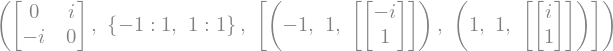

In [96]:
A = Matrix([[0,I], [-I,0]])
A, A.eigenvals(), A.eigenvects()

#### Spørgsmål b

Bestem en ortonormal basis bestående af egenvektorer af $A$.

#### Svar
Da $A$ er hermitisk, ved vi at egenvektorer tilhørende forskellige egenværdier er ortogonale. Derfor skal de to egenvektorer blot normaliseres.

Vi sætter den første ortonormale vector som:
$$
u_2 = \frac{
\begin{bmatrix}
i \\
1
\end{bmatrix}
}{\|
\begin{bmatrix}
i \\
1
\end{bmatrix}\|}
$$


Vi udregner nu $||\begin{bmatrix} i \\ 1 \end{bmatrix}||$:
$$
||\begin{bmatrix} i \\ 1 \end{bmatrix}||= \sqrt{\langle \begin{bmatrix} i \\ 1 \end{bmatrix}, \overline{\begin{bmatrix} i \\ 1 \end{bmatrix}} \rangle} = \sqrt{\langle \begin{bmatrix} i \\ 1 \end{bmatrix}, \begin{bmatrix} -i \\ 1 \end{bmatrix} \rangle} = \sqrt{i \cdot -i + 1 \cdot 1} = \sqrt{2}
$$

Vi får nu:
$$
u_2 = \frac{
\begin{bmatrix}
i \\
1
\end{bmatrix}
}{\|
\begin{bmatrix}
i \\
1
\end{bmatrix}\|} = 
\frac{
\begin{bmatrix}
i \\
1
\end{bmatrix}
}{\sqrt{2}} =
\begin{bmatrix}
\frac{i}{\sqrt{2}} \\
\frac{1}{\sqrt{2}}
\end{bmatrix}
$$

da $e_2$ minder meget om $e_1$ kan vi skrive
$$
u_1 \frac{
\begin{bmatrix}
-i \\
1
\end{bmatrix}
}{\|
\begin{bmatrix}
-i \\
1
\end{bmatrix}\|} = 
\frac{
\begin{bmatrix}
-i \\
1
\end{bmatrix}
}{\sqrt{2}} =
\begin{bmatrix}
\frac{-i}{\sqrt{2}} \\
\frac{1}{\sqrt{2}}
\end{bmatrix}
$$


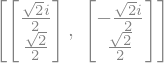

In [97]:
e_1 = Matrix([I, 1])
e_2 = Matrix([-I, 1])
e_1,e_2
GramSchmidt([e_1, e_2], orthonormal=True)

#### Spørgsmål c

Dette resultat gælder for generelle $n \times n$ matricer. Vis at $A = U \Lambda U^*$ hvis og kun hvis $\Lambda = U^* A U$, når $U$ er unitær.

#### Svar
**Løsning:**

Vi vil vise, at $A = U \Lambda U^*$ er ækvivalent med $\Lambda = U^* A U$, når $U$ er en unitær matrix (dvs. $U^* U = U U^* = I$).

1. **Retning ($\Rightarrow$)**  
   Antag $A = U \Lambda U^*$. Vi ganger ligningen fra venstre med $U^*$ og fra højre med $U$:
   $$
   U^* A U \;=\; U^* \bigl(U \Lambda U^*\bigr) U 
             \;=\; \bigl(U^* U\bigr) \,\Lambda\, \bigl(U^* U\bigr) 
             \;=\; I \,\Lambda\, I 
             \;=\; \Lambda.
   $$
   Dermed er $\Lambda = U^* A U$.

2. **Retning ($\Leftarrow$)**  
   Antag $\Lambda = U^* A U$. Vi ganger ligningen fra venstre med $U$ og fra højre med $U^*$:
   $$
   U \Lambda U^* \;=\; U \bigl(U^* A U\bigr) U^* 
                    \;=\; \bigl(U U^*\bigr)\, A \,\bigl(U U^*\bigr)
                    \;=\; I\, A \,I
                    \;=\; A.
   $$
   Dermed er $A = U \Lambda U^*$.

Da begge retninger er vist, er de to udsagn ækvivalente, hvilket beviser, at  
$$
A = U \Lambda U^*
\quad \Longleftrightarrow \quad
\Lambda = U^* A U
$$
når $U$ er en unitær matrix.


#### Spørgsmål d

Opskriv en unitær matrix $U$ og en diagonalmatrix $\Lambda$ så $A = U \Lambda U^*$. Denne formel kaldes en spektral dekomposition af $A$. Tjek dit resultat med SymPy-kommandoen:

#### Svar
Vi finder først $U$, som kan findes da $U$'s søjler skal være en ortonormal basis bestående af egenvektorer. Vi kan altså skrive $U$ som:
$$
U = [u_1, u_2] =
\begin{bmatrix}
\frac{-i}{\sqrt{2}} & \frac{i}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
$$

Vi udregner nu $U^* = \overline{U^T}$
$$
U^T = 
\begin{bmatrix}
\frac{-i}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{i}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
$$

Vi har nu
$$
U^* = 
\begin{bmatrix}
\frac{i}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{-i}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
$$


Vi kan nu udregne $\Lambda = U^*AU$:
$$
\Lambda = 
\begin{bmatrix}
\frac{i}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{-i}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
\cdot
\begin{bmatrix} 
0 & i \\  
-i & 0 
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{-i}{\sqrt{2}} & \frac{i}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
$$

Vi udregner først:
$$
\begin{bmatrix} 
0 & i \\  
-i & 0 
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{-i}{\sqrt{2}} & \frac{i}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix} = 
\begin{bmatrix}
\frac{i}{\sqrt{2}} & \frac{i}{\sqrt{2}} \\
\frac{-1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
$$

Nu kan vi udregne $\Lambda$
$$
\Lambda = 
\begin{bmatrix}
\frac{i}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{-i}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{i}{\sqrt{2}} & \frac{i}{\sqrt{2}} \\
\frac{-1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}= 
\begin{bmatrix}
\frac{1}{\sqrt{2}} \cdot \frac{-1}{\sqrt{2}} + \frac{i}{\sqrt{2}} \cdot \frac{i}{\sqrt{2}} & \frac{1}{\sqrt{2}} \cdot \frac{1}{\sqrt{2}} + \frac{i}{\sqrt{2}} \cdot \frac{i}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} \cdot \frac{-1}{\sqrt{2}} + \frac{-i}{\sqrt{2}} \cdot \frac{i}{\sqrt{2}} & \frac{1}{\sqrt{2}} \cdot \frac{1}{\sqrt{2}} + \frac{-i}{\sqrt{2}} \cdot \frac{i}{\sqrt{2}}
\end{bmatrix}
$$

$$
= 
\begin{bmatrix}
\frac{-1}{2} + \frac{-1}{2} & \frac{1}{2} + \frac{-1}{2} \\
\frac{-1}{2} + \frac{1}{2} & \frac{1}{2} + \frac{1}{2}
\end{bmatrix} = 
\begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}
$$

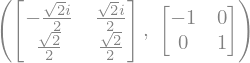

In [98]:
A = Matrix([[0, I], [-I, 0]])
A.diagonalize(normalize = True)

### 3: Ortogonalitet af egenvektorer for symmetriske matricer

Lad $C$ være en $2\times 2$ reel, symmetrisk matrix med to forskellige egenværdier. Vis, at egenvektorer $\pmb{v}_1$ og $\pmb{v}_2$ tilhørende de to forskellige egenværdier er ortogonale, dvs. at
\begin{equation*}
\langle \pmb{v}_1, \pmb{v}_2 \rangle = 0.
\end{equation*}

#### Svar
Lad $C$ være en $2 \times 2$ reel, symmetrisk matrix med to forskellige egenværdier $\lambda_1$ og $\lambda_2$. Lad $\mathbf{v}_1$ være en egenvektor tilhørende $\lambda_1$, og $\mathbf{v}_2$ en egenvektor tilhørende $\lambda_2$. Vi vil vise, at
$$
\langle \mathbf{v}_1, \mathbf{v}_2 \rangle = 0.
$$

1. **Symmetri**  
   At $C$ er symmetrisk, betyder at $C^T = C$. 

2. **Egenvektorer og egenværdier**  
   Vi har pr. definition:
   $$
   C \mathbf{v}_1 = \lambda_1 \mathbf{v}_1,
   \quad
   C \mathbf{v}_2 = \lambda_2 \mathbf{v}_2.
   $$
   Her er $\lambda_1 \neq \lambda_2$.

3. **Beregning af indreprodukt**  
   Betragt indreproduktet $\langle \mathbf{v}_1, C \mathbf{v}_2 \rangle$. Da $\mathbf{v}_2$ er en egenvektor med egenværdi $\lambda_2$, fås
   $$
   \langle \mathbf{v}_1, C \mathbf{v}_2 \rangle 
   \;=\; \langle \mathbf{v}_1, \lambda_2 \mathbf{v}_2 \rangle 
   \;=\; \lambda_2 \langle \mathbf{v}_1, \mathbf{v}_2 \rangle.
   $$

   På den anden side, bruger vi at $C$ er symmetrisk ($C^T = C$), hvilket giver
   $$
   \langle \mathbf{v}_1, C \mathbf{v}_2 \rangle 
   \;=\; \langle C \mathbf{v}_1, \mathbf{v}_2 \rangle 
   \;=\; \langle \lambda_1 \mathbf{v}_1, \mathbf{v}_2 \rangle 
   \;=\; \lambda_1 \langle \mathbf{v}_1, \mathbf{v}_2 \rangle.
   $$

4. **Konklusion**  
   Vi har nu to udtryk for det samme indreprodukt:
   $$
   \lambda_2 \langle \mathbf{v}_1, \mathbf{v}_2 \rangle 
   \;=\; 
   \lambda_1 \langle \mathbf{v}_1, \mathbf{v}_2 \rangle.
   $$
   Da $\lambda_1 \neq \lambda_2$, kan dette kun være sandt, hvis
   $$
   \langle \mathbf{v}_1, \mathbf{v}_2 \rangle = 0.
   $$
   Derved er de to egenvektorer ortogonale.

### 4: Symmetrisk 3-gange-3 matrix.

Givet den *reelle og symmetriske* matrix

\begin{equation*}
  A=\begin{bmatrix} -2 & 1 & 1 \\  1 & -2 & -1 \\  1 & -1 & -2 \end{bmatrix}.
\end{equation*}

Find en **spektral dekomposition** af $A = Q \Lambda Q^T$. Du skal altså angive 
en *reel ortogonal* matrix $Q$ og en *diagonalmatrix* $\Lambda$ så 

\begin{equation*}
   A = Q \Lambda Q^T
\end{equation*}  

eller, ækvivalent, 

\begin{equation*}
  Q^T  \, A\, Q=\Lambda
\end{equation*}  

gælder. Som i opgaven før ved vi at den findes fra <a href="../_assets/textbook_mat1b_en.pdf#cor:spectral-decom-symm">Spectral Theorem (the real case)</a>.

#### Svar
For at gøre dette finder vi først egenvektorne for A:

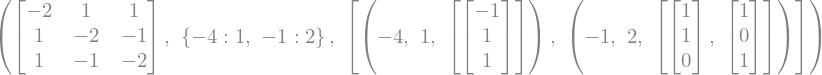

In [99]:
A = Matrix([[-2,1,1],[1,-2,-1],[1,-1,-2]])
A, A.eigenvals(), A.eigenvects()

Vi kan nu definere en vektor $V$, hvis søjler er de tre egenvektors:

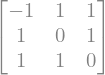

In [100]:
V = Matrix([[-1,1,1],[1,0,1], [1,1,0]])
V

Vi har nu, at $V^{-1}AV = \Lambda$

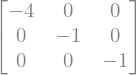

In [101]:
lamda_1 = V**-1 * A * V
lamda_1

Men den $V$ vi har er ikke ortogonal, så vi ortogonaliseres $V$ via gram-schmidth:

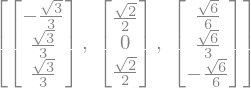

In [102]:
# Brug Gram-Schmidt på søjlerne i V
GramSchmidt([V[:,0], V[:,1], V[:,2]], orthonormal=True)

Vi har altså fundet $Q$ som:
$$
Q =
\begin{bmatrix}
\frac{-\sqrt{3}}{3} & \frac{\sqrt{2}}{2} & \frac{\sqrt{6}}{6} \\
\frac{\sqrt{3}}{3} & 0 & \frac{\sqrt{6}}{3} \\
\frac{\sqrt{3}}{3} & \frac{\sqrt{2}}{2} & \frac{\sqrt{-6}}{6}
\end{bmatrix}
$$

### 5: Spektral dekomposition med SymPy

Vi betragter følgende matricer givet i SymPy:

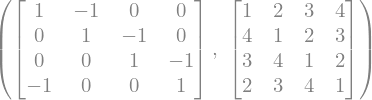

In [103]:
A = Matrix([[1, -1, 0, 0], [0, 1, -1, 0], [0, 0, 1, -1], [-1, 0, 0, 1]])
B = Matrix([[1, 2, 3, 4], [4, 1, 2, 3], [3, 4, 1, 2], [2, 3, 4, 1]])
A, B

Det oplyses at begge matricer er reelle, *normale* matricer. Dette kan tjekkes ved:

In [104]:
A.conjugate() == A, B.conjugate() == B, A*A.T == A.T*A, B*B.T == B.T*B

(True, True, True, True)

Det oplyses endvidere at egenværdierne er hhv:

In [105]:
A.eigenvals(multiple=True), B.eigenvals(multiple=True)

#### Spørgsmål a

Vil nedenstående SymPy-kommandoer give os matricerne der indgår i de spektrale dekompositioner af $A$ og $B$? Kaldet `A.diagonalize(normalize = True)` returnerer $(V,\Lambda)$ hvor $A = V \Lambda V^{-1}$ med *normaliserede* egenvektorer i $V$ og egenværdierne for $A$ i diagonalmatricen $\Lambda$ (jf egenværdiproblemet fra Matematik 1a).

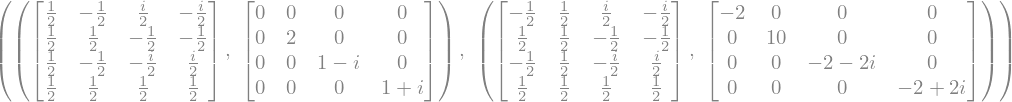

In [106]:
A.diagonalize(normalize = True), B.diagonalize(normalize = True)

#### Svar
For at tjekke dette skal vi bekræfte at:
$$
V \Lambda V^* = A
$$

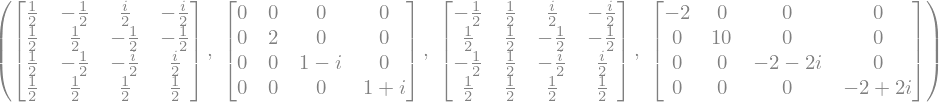

In [107]:
(A_V, A_lambda), ((B_V, B_lambda)) = A.diagonalize(normalize = True), B.diagonalize(normalize = True)
A_V, A_lambda, B_V, B_lambda

In [110]:
simplify(A_V*A_lambda*A_V**-1) == A, simplify(B_V*B_lambda*B_V**-1) == B

(True, True)

Det er altså sandt

#### Spørgsmål b

Findes der en unitær matrix der diagonaliserer *både* $A$ *og* $B$? Altså, findes der **en** unitær matrix så $A = U \Lambda_1 U^*$ og $B = U \Lambda_2 U^*$, hvor 
$\Lambda_1$ er en diagonal matrix med $A$'s egenværdier og $\Lambda_2$ er en diagonal matrix med $B$'s egenværdier?

#### Svar
Vi ser at A_V og B_V faktisk har de samme søjler, så hvis vi bytter den første søjle ud med den anden for A_V, så skal vi bare bytte første række ud med anden for A_lambda. 

#### Spørgsmål c

Du har set matricen $U$ eller $U^*$ før (eventuelt med søjlerne i en anden rækkefølge). Hvad er det for en matrix?

#### Svar
$U$ er den såkaldte Fourier-matrix.

### 6: Diagonalisering og reduktion af kvadratisk form

Vi betragter funktionen $q : \mathbb{R}^3 \to \mathbb{R}$ givet ved
\begin{equation*}
  q(x,y,z)=-2x^2-2y^2-2z^2+2xy+2xz-2yz+2x+y+z+5.
\end{equation*}

Bemærk at $q$ kan deles op i to led: de "rene" andengradsled $k(x,y,z)=-2x^2-2y^2-2z^2+2xy+2xz-2yz$ og det andet led: et førstegradspolynomium $2x+y+z+5$.

Givet den symmetriske matrix

\begin{equation*}
A=\begin{bmatrix} -2 & 1 & 1 \\  1 & -2 & -1 \\  1 & -1 & -2 \end{bmatrix}.
\end{equation*}

#### Spørgsmål a

Angiv en reel, ortogonal matrix $Q$ og en diagonalmatrix $\Lambda$, således at

\begin{equation*}
  Q^T \, A\, Q=\Lambda.
\end{equation*}

Du skal vælge $Q$ så den har $\operatorname{det}\,Q=1$. Du må gerne bruge SymPy til denne opgave.

**Note:**
Reelle, ortogonale matricer har altid  $\operatorname{det}\,Q = \pm 1$ (hvorfor mon?), så hvis dit valg $Q$ har $\operatorname{det}\,Q = - 1$ kan du blot skifte fortegn på en valgfri søjle eller række. Reelle, ortogonale matricer megd $\operatorname{det}\,Q = 1$ kaldes sædvanligt orienteret. I $\mathbb{R}^3$ betyder det blot at den ortonormale basis i $Q$ er et *højredrejet* koordinatsystem. Det spiller ikke noget stor rolle for os i denne opgave.

#### Svar
For at løse dette vil vi først fine egenvektorne for $A$

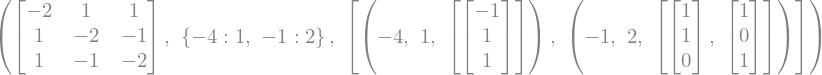

In [111]:
A = Matrix([[-2,1,1],[1,-2,-1],[1,-1,-2]])
A, A.eigenvals(), A.eigenvects()

Vi kan nu opsætte $V$

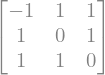

In [113]:
V = Matrix([[-1,1,1],[1,0,1], [1,1,0]])
V

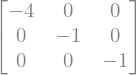

In [117]:
lamda_1 = V**-1 * A * V
lamda_1

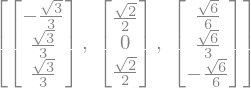

In [114]:
GramSchmidt([V[:,0], V[:,1], V[:,2]], orthonormal=True)

#### Spørgsmål b

Bestem forskriften $k(x,y,z),$ omform den til matrixform, og *reducér* den.

#### Spørgsmål c

Find en sædvanligt orienteret ortonormal basis for $\mathbb{R}^3$ hvori forskriften for $q$ er uden blandede led. Bestem forskriften.

### 7: Den partielle afledte vokser/aftager mest i gradient-retningen

Denne opgave er taget fra <a href="../_assets/textbook_mat1b_en.pdf#exe:max-direct-deriv-in-grad">bogen</a>, og formålet er at argumentere for, hvorfor man i gradient-metoden går i gradientvektorens retning. 

Lad $f: \mathbb{R}^{n} \to \mathbb{R}$ være en funktion, for hvilken alle retningsafledte eksisterer i $\pmb{x} \in \mathbb{R}^{n}$. Antag at $\nabla f(\pmb{x})$ ikke er nul-vektoren.

#### Spørgsmål a

Vis at $\pmb{u} := \nabla f(\pmb{x}) / \Vert \nabla f(\pmb{x}) \Vert$ er en enhedsvektor.

#### Spørgsmål b

Vis at skalaren $|\nabla_{\pmb{v}}f(\pmb{x})|$ bliver størst mulig, når $\pmb{v} = \pm \pmb{u}$.

### 8: Standardligning for de tre typiske keglesnit

I de følgende eksempler ser vi på kvadratiske former uden *blandede led* (da vi jo netop kan slippe af med disse via diagonalisering som i forrige opgave). Her er det muligt at gå skridtet videre og fjerne førstegradsleddene. Denne teknik kaldes [kvadratkomplettering](https://da.wikipedia.org/wiki/Kvadratkomplettering#Eksempel_1). I det følgende skal vi bruge teknikken på vejen mod identifikation af såkaldte keglesnit.

#### Spørgsmål a

En ellipse i $(x,y)$-planen med centrum $(c_1,c_2),$ halvakserne $a$ og $b$ og symmetriakserne $x=c_1$ og $y=c_2$ har standardligningen

\begin{equation*}
  \frac{(x-c_1)^2}{a^2}+\frac{(y-c_2)^2}{b^2}=1.
\end{equation*}
  
En ellipse er givet ved ligningen

\begin{equation*}
  4x^2+y^2+8x-6y+9=0.
\end{equation*}

Udfør kvadratkomplettering, sæt ligningen på standardform, og angiv ellipsens centrum, halvakser og symmetriakser.

#### Spørgsmål b

En hyperbel i $(x,y)$-planen med centrum $(c_1,c_2),$ halvakserne $a$ og $b$ og symmetriakserne $x=c_1$ og $y=c_2$ har standardligningen

\begin{equation*}
  \frac{(x-c_1)^2}{a^2}-\frac{(y-c_2)^2}{b^2}=1.
\end{equation*}

Eller alternativt (hvis den ikke er vandret, men lodret):

\begin{equation*}
  \frac{(y-c_2)^2}{a^2}-\frac{(x-c_1)^2}{b^2}=1.
\end{equation*}

En hyperbel er givet ved ligningen

\begin{equation*}
  x^2-y^2-4x-4y = 4.
\end{equation*}

Udfør kvadratkomplettering, sæt ligningen på standardform, og angiv hyperblens centrum, halvakser og symmetriakser.

#### Spørgsmål c

En parabel i $(x,y)$-planen med toppunkt $(c_1,c_2)$ og symmetriaksen $x=c_1$ har standardligningen

\begin{equation*}
  y-c_2=a(x-c1)^2.
\end{equation*}

Eller alternativt, hvis parablen ikke er lodret men vandret, hvorved symmetriaksen bliver $y=c_2$:

\begin{equation*}
  x-c_1=a(y-c2)^2.
\end{equation*}

En parabel er givet ved ligningen

\begin{equation*}
  2x^2+12x-y+17=0.
\end{equation*}

Udfør kvadratkomplettering, sæt ligningen på standardform, og angiv parablens  toppunkt og symmetriakse.

___

## Temaøvelse -- Lille Dag

Der er tema-øvelse [](tema:2)